## Data analysis
the training set after segmentation was used for initial data analysis.

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns
import os
import yaml
import json

import matplotlib.pyplot as plt

cwd = os.getcwd()

if cwd == "/app/scripts":
    filepath = "../data/segmentation/train.csv"
else:
    params = yaml.safe_load(open('params.yaml'))['analysis']
    filepath = params['datasets']
    
df = pd.read_csv(filepath)
df.head().T


,0,1,2,3,4
Unnamed: 0,10042,27682,25754,20584,3709
overall,positive,positive,negative,negative,positive
verified,True,False,True,True,False
reviewTime,"01 18, 2013","10 3, 2015","04 9, 2015","05 24, 2018","03 5, 2007"
reviewerID,A1UV263N7BF8XG,A3S3R88HA0HZG3,A1XYATUTPV7MN9,A58OFA7T7WN9Z,A1WX42M589VAMQ
asin,B00176GSEI,B00R69ZDW8,B00JIM55MY,B000IIA5UO,B000NG80GM
reviewerName,Vicki Munoz,PT Cruiser,Dr. Mom,E. Han,Mir
reviewText,I love the Hot Tools brand and this one curlin...,I much prefer creme blushes to powder but they...,Did not work as well as kits from other compan...,Okay this iron has a problem. I don't know why...,"I've been doing my nails (not a salon, ME), si..."
summary,Hot Tools are the Best,Natural looking and very easy to apply,Falls off/falls apart,"Poor design, It won't curl med- long hair.","Outstanding Colors, Incredible Wear: Best nail..."
unixReviewTime,1358467200,1443830400,1428537600,1527120000,1173052800


In [2]:
# Parameters
output_dir = "data/"


In [3]:
df = df.drop("Unnamed: 0", axis=1)
print("")
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'style.Size:', 'vote', 'style.Flavor Name:', 'style.Color:', 'image',
       'style.Format:', 'style.Style Name:', 'style.Style:', 'style.Scent:',
       'style.Package Quantity:', 'style.Flavor:', 'style.Package Type:',
       'style.Scent Name:', 'weekday', 'VerifiedAndVoted', 'word_count',
       'ReviewLength'],
      dtype='object')

### Null values analysis

In [4]:
df.isna().sum()

overall                        0
verified                       0
reviewTime                     0
reviewerID                     0
asin                           0
reviewerName                   0
reviewText                    11
summary                       11
unixReviewTime                 0
style.Size:                20027
vote                       19434
style.Flavor Name:         23981
style.Color:               17274
image                      23559
style.Format:              23821
style.Style Name:          23890
style.Style:               22840
style.Scent:               23723
style.Package Quantity:    23986
style.Flavor:              23979
style.Package Type:        23985
style.Scent Name:          23972
weekday                        0
VerifiedAndVoted               0
word_count                    11
ReviewLength                   0
dtype: int64

In [5]:
df.dtypes

overall                     object
verified                      bool
reviewTime                  object
reviewerID                  object
asin                        object
reviewerName                object
reviewText                  object
summary                     object
unixReviewTime               int64
style.Size:                 object
vote                       float64
style.Flavor Name:          object
style.Color:                object
image                       object
style.Format:               object
style.Style Name:           object
style.Style:                object
style.Scent:                object
style.Package Quantity:    float64
style.Flavor:               object
style.Package Type:         object
style.Scent Name:           object
weekday                      int64
VerifiedAndVoted              bool
word_count                 float64
ReviewLength                 int64
dtype: object

In [6]:
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]):
        df.fillna((df[col].median()), inplace=True)
    else:
        df.fillna("", inplace=True)

df.isna().sum()

overall                    0
verified                   0
reviewTime                 0
reviewerID                 0
asin                       0
reviewerName               0
reviewText                 0
summary                    0
unixReviewTime             0
style.Size:                0
vote                       0
style.Flavor Name:         0
style.Color:               0
image                      0
style.Format:              0
style.Style Name:          0
style.Style:               0
style.Scent:               0
style.Package Quantity:    0
style.Flavor:              0
style.Package Type:        0
style.Scent Name:          0
weekday                    0
VerifiedAndVoted           0
word_count                 0
ReviewLength               0
dtype: int64

### Categorical and numerical variables

In [7]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.describe()

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style.Size:,vote,style.Flavor Name:,...,image,style.Format:,style.Style Name:,style.Style:,style.Scent:,style.Package Quantity:,style.Flavor:,style.Package Type:,style.Scent Name:,word_count
count,23994,23994,23994,23994,23994,23994,23994,23994,23994,23994,...,23994,23994,23994,23994,23994,23994,23994,23994,23994,23994.0
unique,3,2416,3817,1566,3576,17987,14938,324,98,8,...,371,2,15,121,65,2,2,4,13,619.0
top,positive,"06 19, 2017",A2NT1LGR2BYP0I,B001MF3FMW,Amazon Customer,I have very sensitive skin. Over the years I ...,Five Stars,,,,...,,,,,,,,,,2.0
freq,19461,131,95,846,709,94,2464,20027,19434,23981,...,23559,23821,23890,22840,23723,23986,23979,23985,23972,642.0


### Correlations


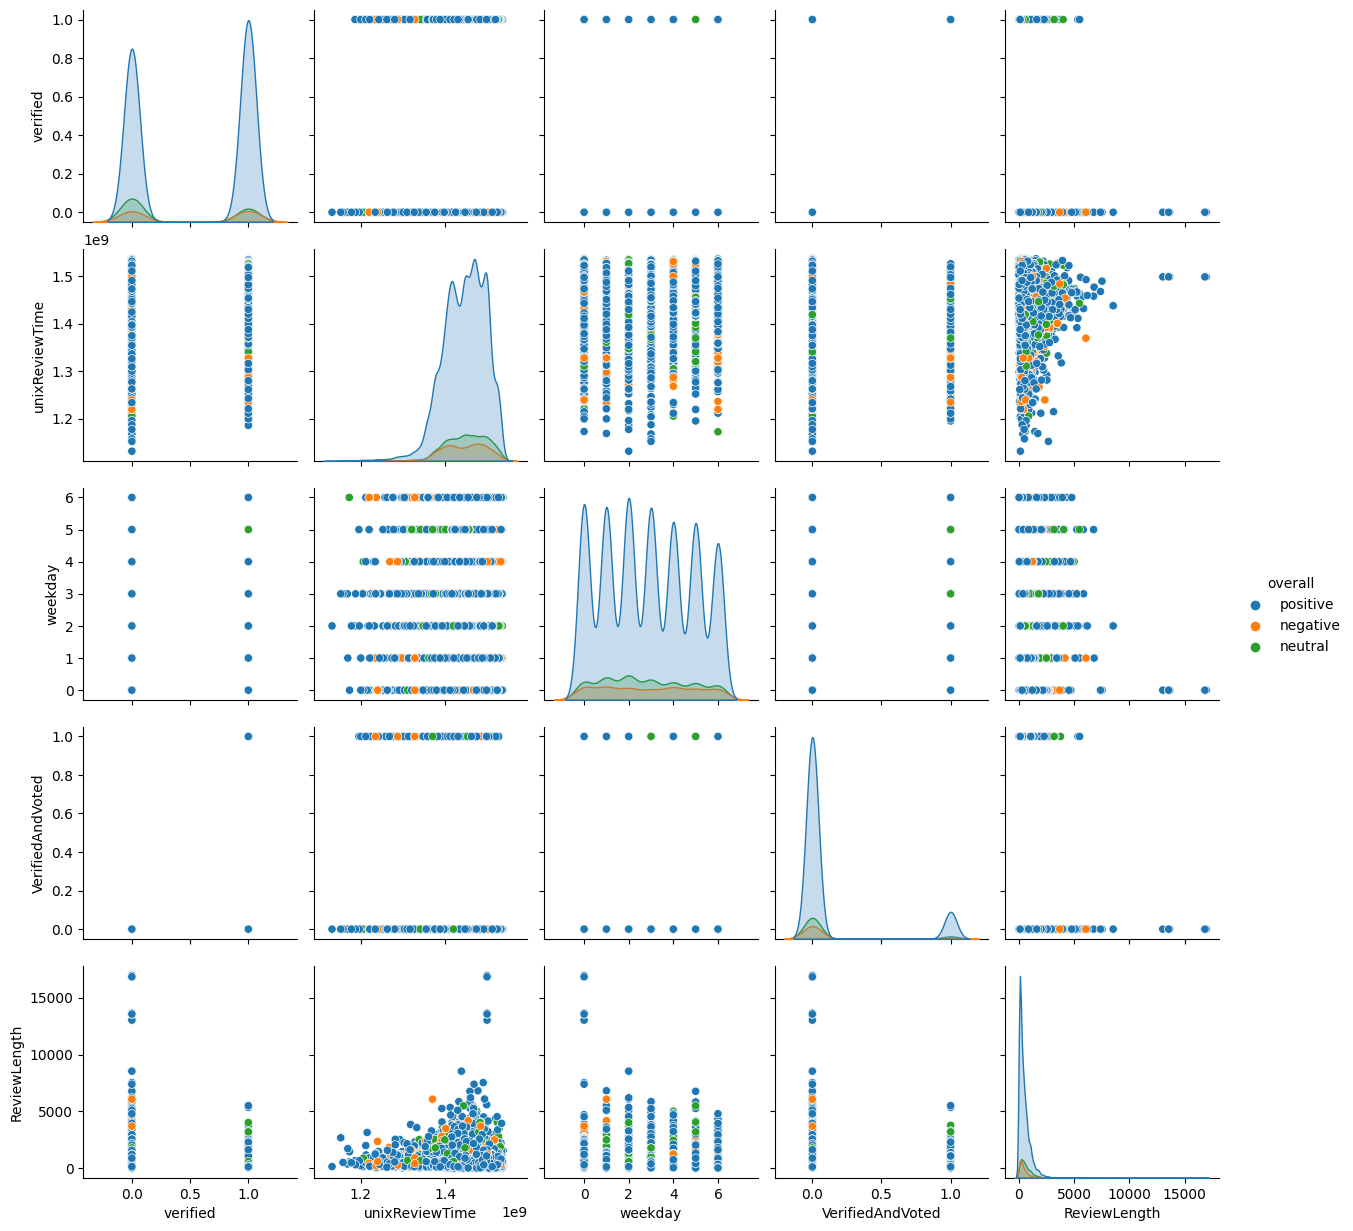

In [8]:

sns.pairplot(df, hue="overall")
plt.show()

/tmp/ipykernel_350/1987584277.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

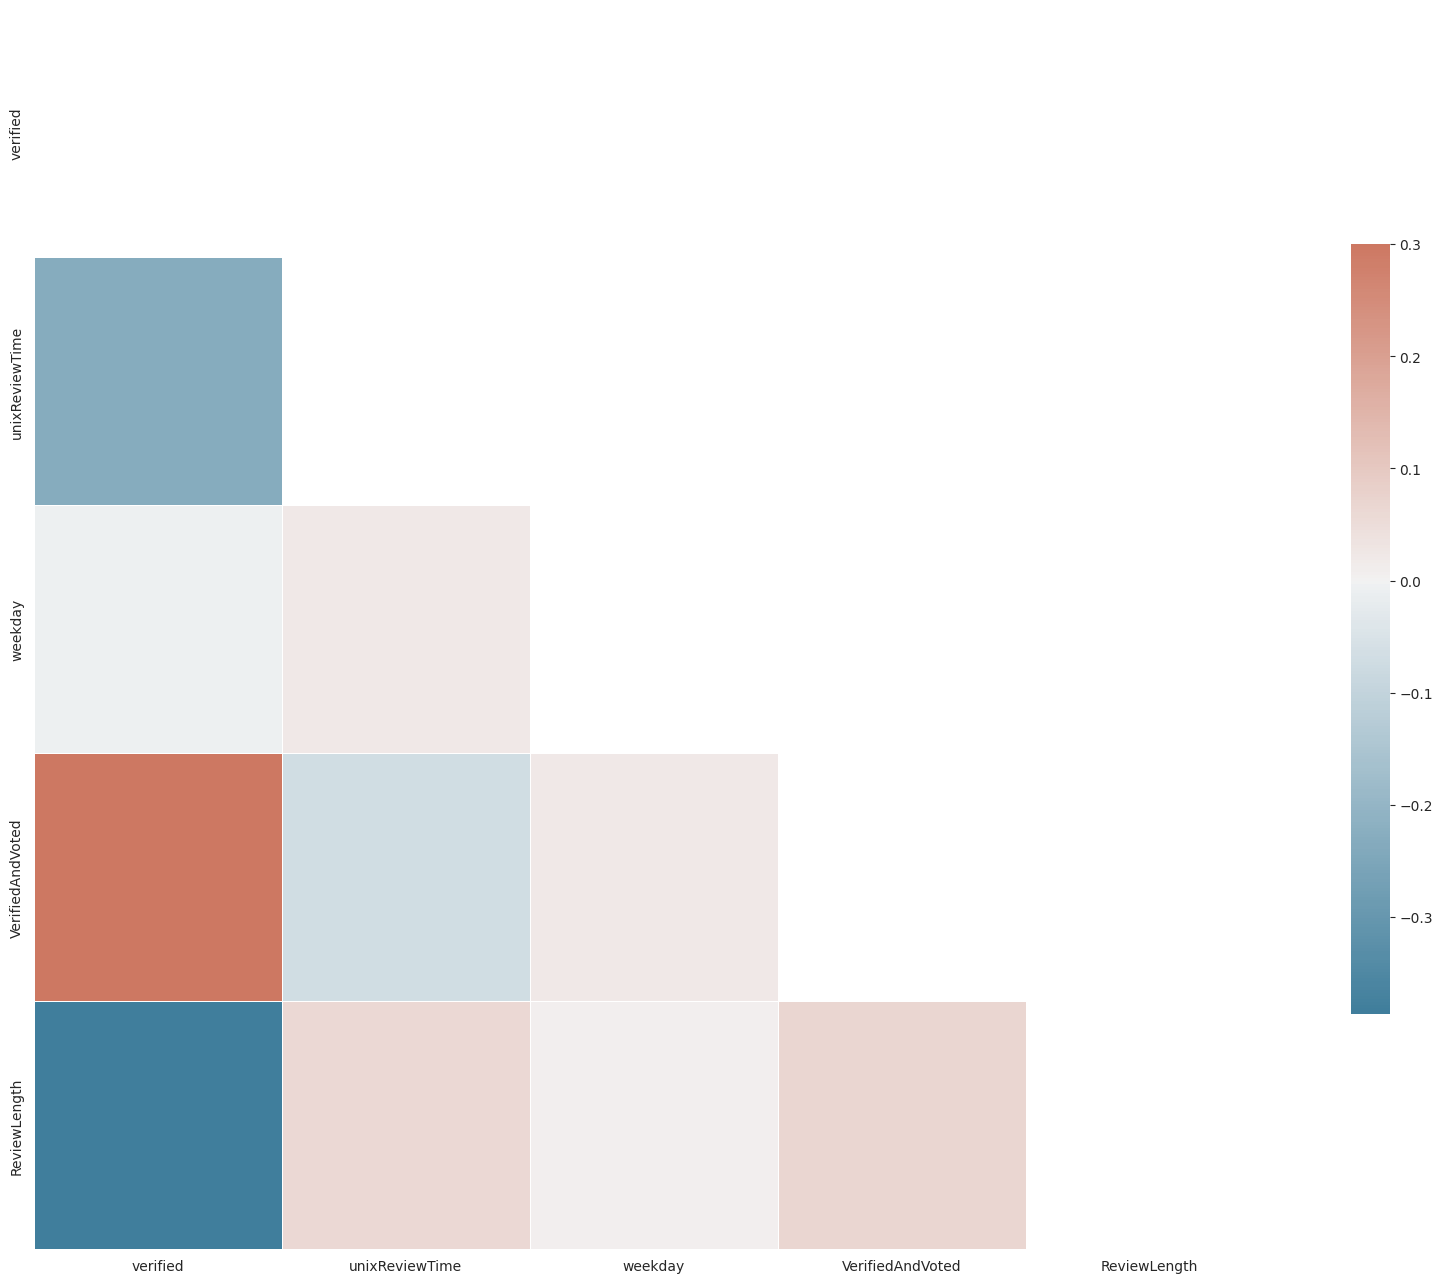

In [9]:
corr = df.corr()
sns.set_style(style = 'white')
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
df.corr()

/tmp/ipykernel_350/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,verified,unixReviewTime,weekday,VerifiedAndVoted,ReviewLength
verified,1.000000,-0.229575,-0.006986,0.348496,-0.386902
unixReviewTime,-0.229575,1.000000,0.022441,-0.072430,0.063708
weekday,-0.006986,0.022441,1.000000,0.022842,0.005344
VerifiedAndVoted,0.348496,-0.072430,0.022842,1.000000,0.066937
ReviewLength,-0.386902,0.063708,0.005344,0.066937,1.000000


Basic correlation analysis (Pairplot, correlation heatmap and tabular presentation) was performed on data with numerical representation. An apparent positive correlation was observed for text length and word count, which is not revealing. Positive correlation occurred between data that contain verified opinions and verified and additionally those that were voted for. A weak positive correlation is also seen between the length of reviews and the number of words and votes cast, which may indicate that longer reviews are more helpful.
A negative correlation occurred between whether a review was reviewed and the length of the review.
The other data in the numerical summary above did not show strong correlations.

Based on the graphs of correlations between groups with 'overall' as a category, it was not observed that for any of the characteristics the output groups are separated. Regarding the distribution of variables (see pairplot), no correlation was observed with the type of opinion, the only apparent correlation is due to the fact that there are significantly more opinions mapped as positive than neutral and negative, as shown numerically below.

In [11]:
print("Number of positives: ", df[df['overall'] == 'positive'].shape[0])
print("Number of neutral: ", df[df['overall'] == 'neutral'].shape[0])
print("Number of negatives: ", df[df['overall'] == 'negative'].shape[0])

Number of positives:  19461
Number of neutral:  2719
Number of negatives:  1814


### Text data analysis


In [12]:
df["reviewText"].str.lower()
df_new = df.copy()
df_new["reviewText"] = df_new["reviewText"].str.lower()
df_new["reviewText"].str.split(expand=True).stack().value_counts().head(30)


the        86023
i          75250
a          66397
and        63377
it         57211
to         49093
is         40245
this       39954
my         35771
of         31007
for        25832
that       22934
in         20467
but        19898
on         19297
with       19267
have       17690
not        17144
as         14752
you        14423
skin       12846
like       11861
so         11328
was        11169
very       11027
use         9399
or          9320
product     8904
it's        8605
be          8385
dtype: int64


In conclusion, based on the extraction of adjectives alone, it is impossible to define sentiment, single words without context do not say much, which is also indicated by the appearance of 'good; in all three groups, which indicates a positive overtone, however, could have indicated something like "I was searching for something good but I wasn't this item".